In [62]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# create a neural network class inheriting from the nn.Module
# Call it NeuralNetwork and make, and use "pass" in the constructor
# so that it doesn't give an error
# Instantiate one instance of it in variable net


class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        pass

net = NeuralNetwork()

In [3]:
assert isinstance(net, NeuralNetwork)

In [4]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim and num_hidden, respectively the dimension of 
# the input and the number of hidden neurons
# use pass again

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden):
        super(NeuralNetwork).__init__()
        pass


In [5]:
assert NeuralNetwork(input_dim=10, num_hidden=16)

In [6]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim, num_hidden1 and num_hidden2, respectively the dimension of 
# the input and the number of hidden neurons for the first fully connected
# layer and the second. Define the attributes in the constructor
# that consists of the layers, call them fc1, fc2 and fc3 and a sigmoid.
# use pass again. Be careful to put the dimensions in the right places!
# Since we will do a binary classification problem, fc3 will have 1 neuron
# as output

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        layer1 = self.fc1(x)             # layer1 = W.X + b
        act1 = self.sigmoid(layer1)      # activation = sigma(layer)
        layer2 = self.fc2(act1)
        act2 = self.sigmoid(layer2)
        layer3 = self.fc3(act2)
        out = self.sigmoid(layer3)
        return out
        
        

In [7]:
net = NeuralNetwork(16, 16, 16)
assert net.fc1
assert net.fc2
assert net.fc3
assert net.sigmoid

In [8]:
# Define the forward pass to make a reasonable use of the attributes
# you defined before. Follow the same reasoning we used in class

model = NeuralNetwork(10, 7, 8)


In [9]:
model.parameters()

<generator object Module.parameters at 0x0000022CFA89D120>

In [33]:
# For training a model, use the following optimizer and loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()    # Binary Cross Entropy


In [ ]:
# train a neural network (feel free to choose the num_hidden1 and num_hidden2)
# on the dataset in data.csv file
# You'll have fun with conflicting shapes and types and tensors, but
# you'll get those errors anyway. Let's go into the wild and learn
# by reading the errors and trying to understand them! :)
# You can always use the provided Workbook

In [12]:
# data
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [37]:

X = torch.tensor(data.drop(2, axis=1).values, dtype=torch.float)

y = torch.tensor(data[1].values, dtype=torch.float).view(-1, 1)

In [42]:
neuralnet = NeuralNetwork(X.shape[1], 10, 10)
optimizer = torch.optim.Adam(neuralnet.parameters(), lr=0.01)

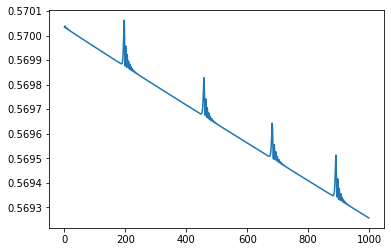

In [54]:
losses = []
# Training
epochs = 1000
for epoch in range(epochs):

    # predictions
    pred = neuralnet(X)

    # loss function
    l = loss(pred, y)
    
    # gradients
    l.backward()   
    
    # update parameters
    optimizer.step()

    # zero the optimizer
    optimizer.zero_grad()

    # store loss for plotting
    losses.append(l.detach())
    # print(f'Epoch {epoch}, loss {l.item():.2f}')

   
    
plt.plot(losses)
    

In [129]:
class NeuralNetwork2(nn.Module):
    def __init__(self, input_nodes, hidden1_nodes, hidden2_nodes):
        super(NeuralNetwork2, self).__init__()
        self.linear1 = nn.Linear(input_nodes, hidden1_nodes)
        self.linear2 = nn.Linear(hidden1_nodes, hidden2_nodes)
        self.linear3 = nn.Linear(hidden2_nodes, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        layer1 = self.linear1(x)
        activ1 = self.relu(layer1)
        layer2 = self.linear2(activ1)
        act2 = self.relu(layer2)
        layer3 = self.linear3(act2)
        output = self.sigmoid(layer3)
        return output

In [164]:

def train_model(x, y, model, loss_func, learning_rate = 0.1, epochs = 1000):
    
    torch.manual_seed(0)

    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    losses = []

    for epoch in range(epochs):
        
        # predictions
        preds = model(x)

        # loss
        l = loss_func(preds, y)
        losses.append(l.detach().item())

        # gradients
        l.backward()

        # paramaters update
        optimizer.step()

        # reset optimizer
        optimizer.zero_grad()

    # Loss plot
    plt.plot(list(range(epochs)), losses)
    plt.xlabel('Epoch') 
    plt.ylabel('Loss')
    plt.show()

    return model

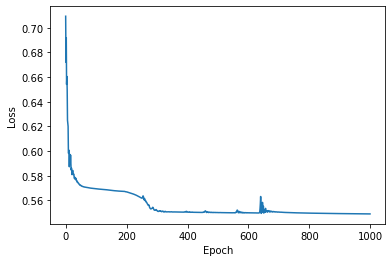

In [165]:
neuralnet2 = NeuralNetwork2(2, 13, 9)
trained_net = train_model(x = X, y = y, model = neuralnet2, loss_func = loss)